import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Processsed_data.csv')
df['gender'] = df['gender'].map({-1: 'Male', 1: 'Female'})

plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()


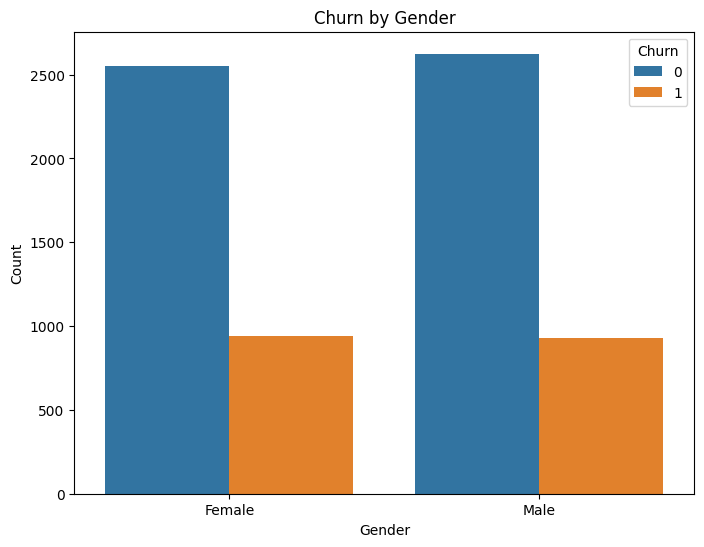

1.0397815715207734


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def reverse(f):
    if f>1:
         return f
    return 1/f
data = pd.read_csv('Processsed_data.csv')
data['gender'] = data['gender'].map({-1: 'Male', 1: 'Female'})
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
variant = {}
male_filter = data['gender'] == 'Male'
female_filter = data['gender'] == 'Female'
male_ratio = (male_filter & (data['Churn'] == 0)).sum() / (male_filter & (data['Churn'] == 1)).sum()
female_ratio = (female_filter & (data['Churn'] == 0)).sum() / (female_filter & (data['Churn'] == 1)).sum()
rgender = reverse(male_ratio/female_ratio)
variant['gender']=rgender
plt.show()
print(rgender)

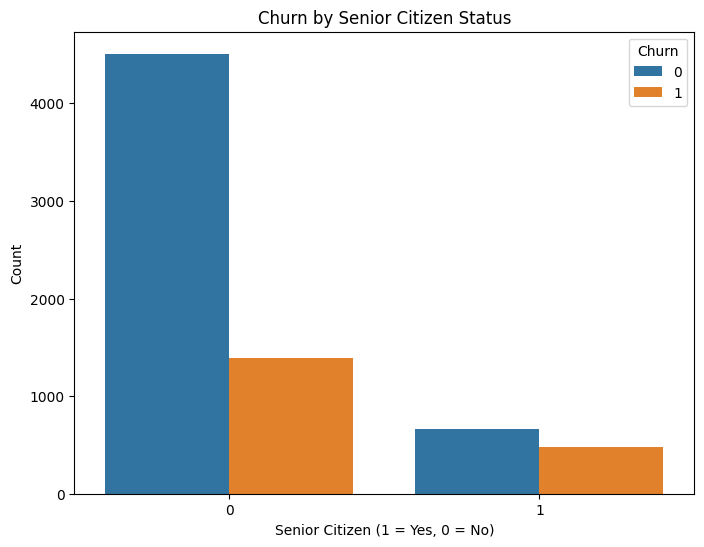

2.312946111941087


In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
P_filter = data['SeniorCitizen'] == 1
NP_filter = data['SeniorCitizen'] == 0
P_ratio = (P_filter & (data['Churn'] == 0)).sum() / (P_filter & (data['Churn'] == 1)).sum()
NP_ratio = (NP_filter & (data['Churn'] == 0)).sum() / (NP_filter & (data['Churn'] == 1)).sum()
rsenior = reverse(P_ratio/NP_ratio)
variant['SeniorCitizen']=rsenior
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()
print(rsenior)


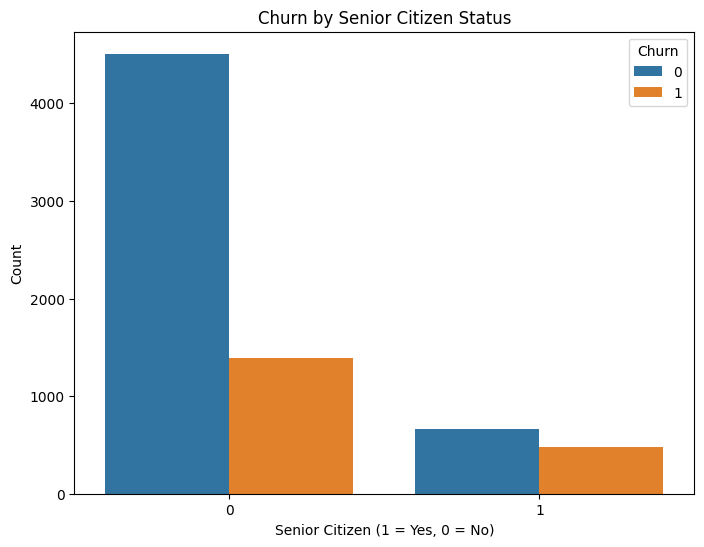

In [77]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

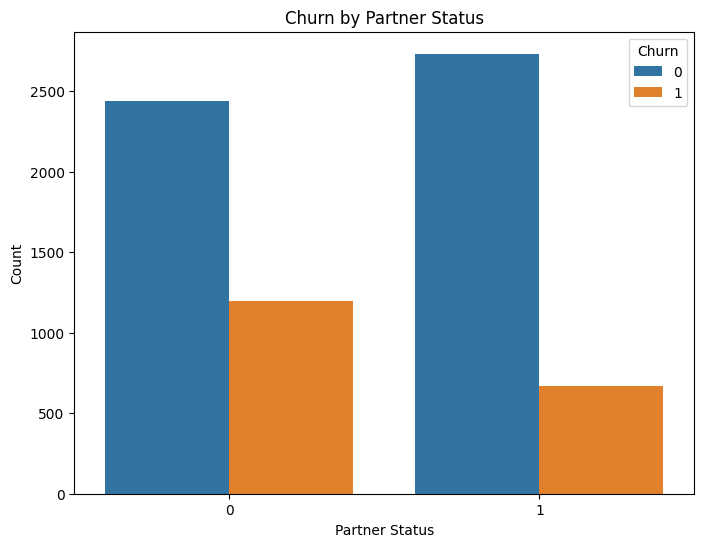

2.0082925655331287


In [78]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=data)
plt.title('Churn by Partner Status')
plt.xlabel('Partner Status')
plt.ylabel('Count')
plt.show()
S_filter = data['Partner'] == 1
NS_filter = data['Partner'] == 0
S_ratio = (S_filter & (data['Churn'] == 0)).sum() / (S_filter & (data['Churn'] == 1)).sum()
NS_ratio = (NS_filter & (data['Churn'] == 0)).sum() / (NS_filter & (data['Churn'] == 1)).sum()
rpartner = reverse(S_ratio/NS_ratio)
variant['Partner']=rpartner
print(rpartner)

2.4908265016197046


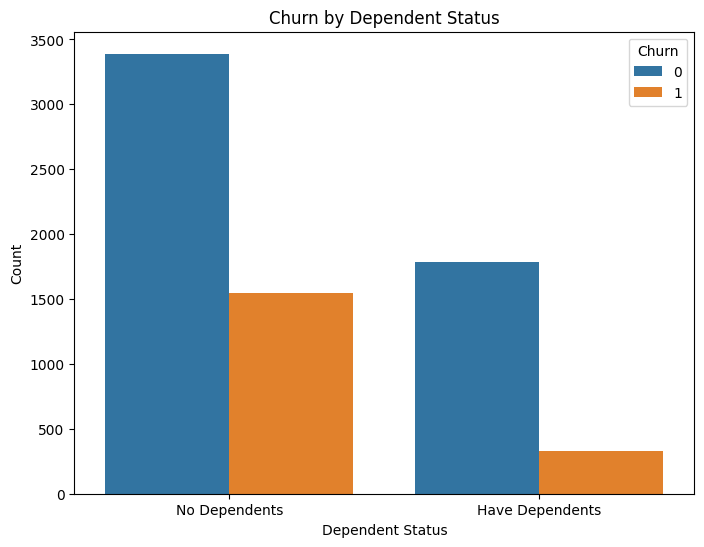

In [79]:
S_filter = data['Dependents'] == 1
NS_filter = data['Dependents'] == 0
S_ratio = (S_filter & (data['Churn'] == 0)).sum() / (S_filter & (data['Churn'] == 1)).sum()
NS_ratio = (NS_filter & (data['Churn'] == 0)).sum() / (NS_filter & (data['Churn'] == 1)).sum()
rdependents = reverse(S_ratio/NS_ratio)
variant['Dependents']=rdependents
print(rdependents)
data['Dependents'] = data['Dependents'].map({1: 'Have Dependents', 0: 'No Dependents'})
plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Churn', data=data)
plt.title('Churn by Dependent Status')
plt.xlabel('Dependent Status')
plt.ylabel('Count')
plt.show()

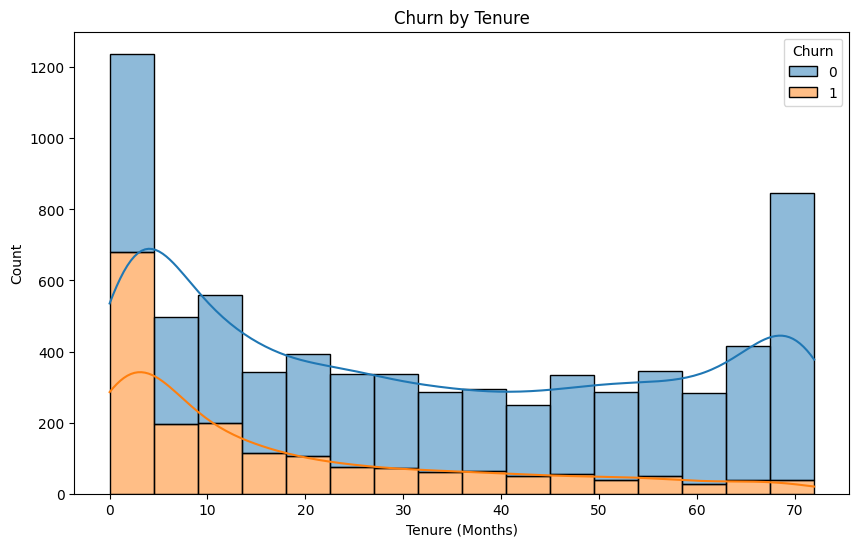

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='tenure', hue='Churn', multiple="stack", kde=True)
plt.title('Churn by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

1.0975950740656624


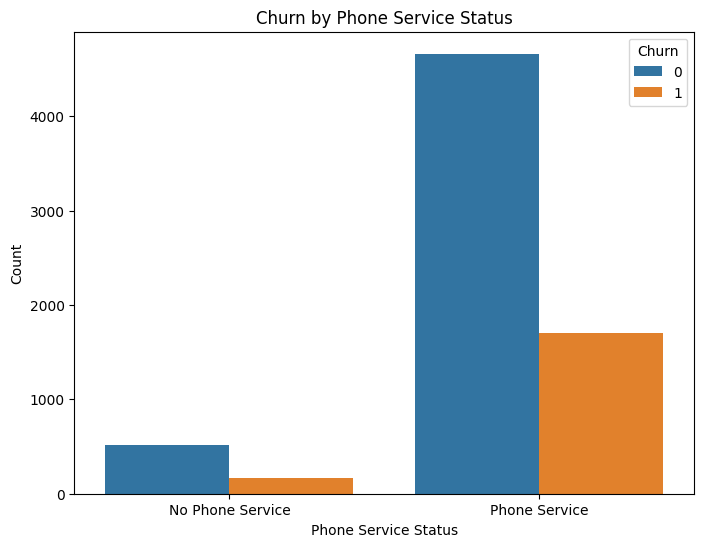

In [81]:
S_filter = data['PhoneService'] == 1
NS_filter = data['PhoneService'] == 0
S_ratio = (S_filter & (data['Churn'] == 0)).sum() / (S_filter & (data['Churn'] == 1)).sum()
NS_ratio = (NS_filter & (data['Churn'] == 0)).sum() / (NS_filter & (data['Churn'] == 1)).sum()
rPhoneService = reverse(S_ratio/NS_ratio)
variant['PhoneService']=rPhoneService
print(rPhoneService)
data['PhoneService'] = data['PhoneService'].map({0: 'No Phone Service', 1: 'Phone Service'})
plt.figure(figsize=(8, 6))
sns.countplot(x='PhoneService', hue='Churn', data=data)
plt.title('Churn by Phone Service Status')
plt.xlabel('Phone Service Status')
plt.ylabel('Count')
plt.show()

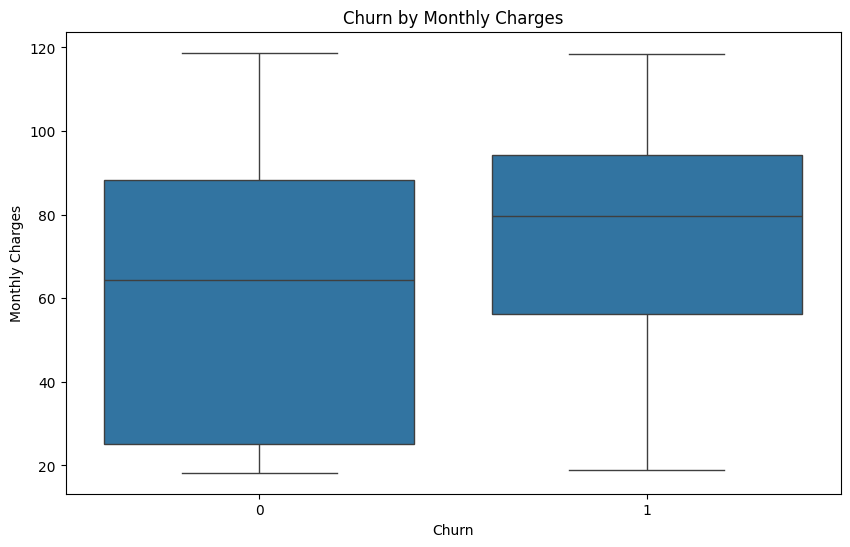

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Churn by Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

# New Section

3.0777647298804283


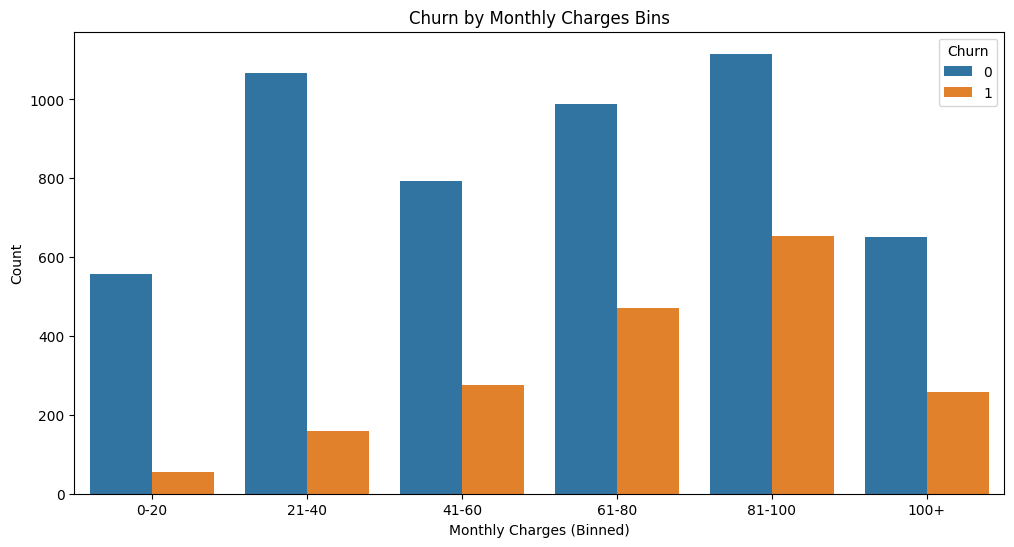

In [83]:
def getratio(filter):
    return  reverse((filter & (data['Churn'] == 0)).sum() / (filter & (data['Churn'] == 1)).sum())
def std(list1):
    mean = sum(list1)/len(list1)
    variance = sum([((x - mean) ** 2) for x in list1]) / len(list1) 
    return variance**0.5
bins = [0, 20, 40, 60, 80, 100, data['MonthlyCharges'].max()]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '100+']
data['MonthlyChargesBins'] = pd.cut(data['MonthlyCharges'], bins=bins, labels=labels, right=False)
values = []
for l in labels:
    filter = data['MonthlyChargesBins'] == l
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations = {}
stddeviations['MonthlyChargesBins'] = sd
# Visualization: Churn vs MonthlyCharges Bins
plt.figure(figsize=(12, 6))
sns.countplot(x='MonthlyChargesBins', hue='Churn', data=data)
plt.title('Churn by Monthly Charges Bins')
plt.xlabel('Monthly Charges (Binned)')
plt.ylabel('Count')
plt.show()

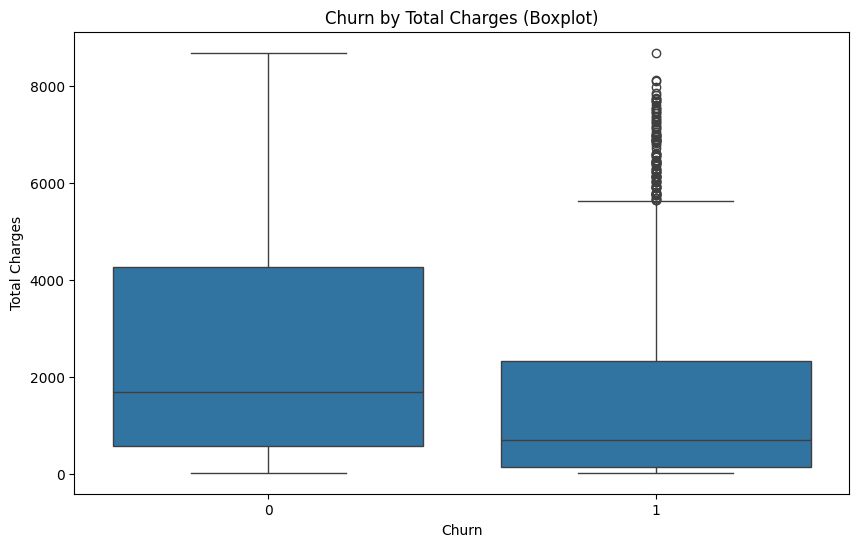

In [84]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna(subset=['TotalCharges'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('Churn by Total Charges (Boxplot)')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

1.6742049515330057


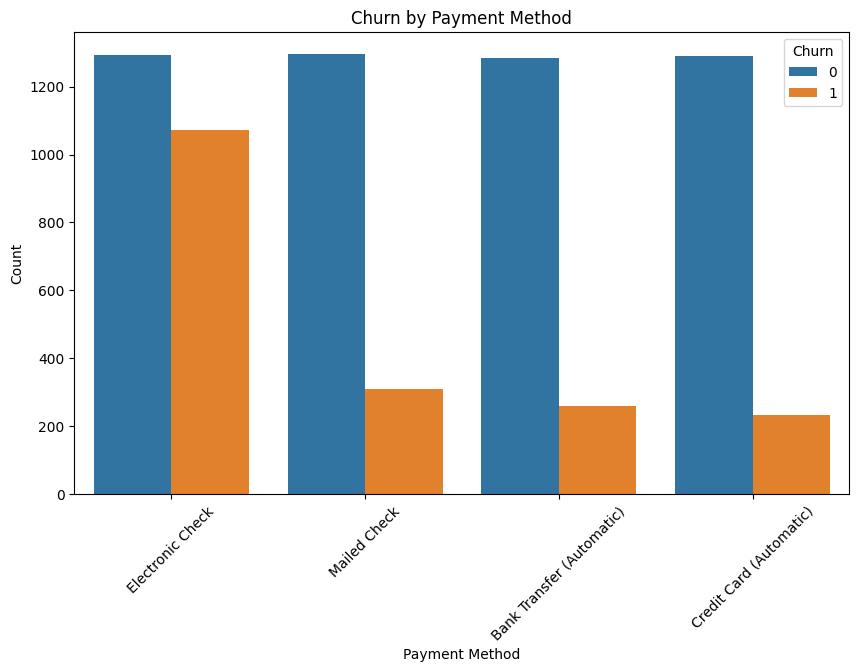

In [85]:
values = []
for l in range(4):
    filter = data['PaymentMethod'] == l+1
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations['PaymentMethod'] = sd
payment_methods = {
    1: 'Electronic Check',
    2: 'Mailed Check',
    3: 'Bank Transfer (Automatic)',
    4: 'Credit Card (Automatic)'
}
data['PaymentMethod'] = data['PaymentMethod'].map(payment_methods)

stddeviations = {}
stddeviations['MonthlyChargesBins'] = sd
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

14.159227588671019


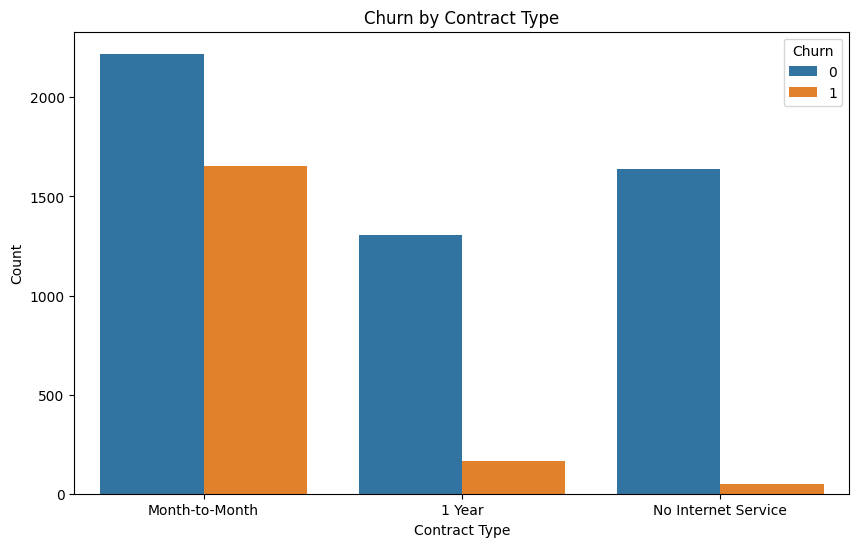

In [86]:
values = []
for l in range(3):
    filter = data['Contract'] == l+1
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations['Contract'] = sd
contract_types = {
    1: 'Month-to-Month',
    2: '1 Year',
    3: 'No Internet Service'
}
data['Contract'] = data['Contract'].map(contract_types)

# Visualization: Churn vs Contract
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

4.8576770008528944


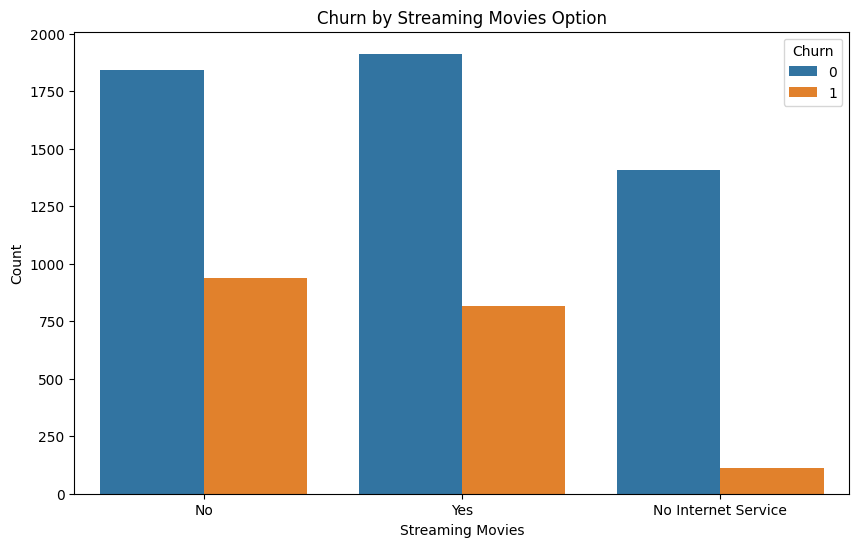

In [87]:
values = []
for l in range(3):
    filter = data['StreamingMovies'] == l-1
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations['SreamingMovies'] = sd
streaming_movies = {
    0: 'No',
    1: 'Yes',
    -1: 'No Internet Service'
}
data['StreamingMovies'] = data['StreamingMovies'].map(streaming_movies)

# Visualization: Churn vs StreamingMovies
plt.figure(figsize=(10, 6))
sns.countplot(x='StreamingMovies', hue='Churn', data=data)
plt.title('Churn by Streaming Movies Option')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.show()

4.857449657799128


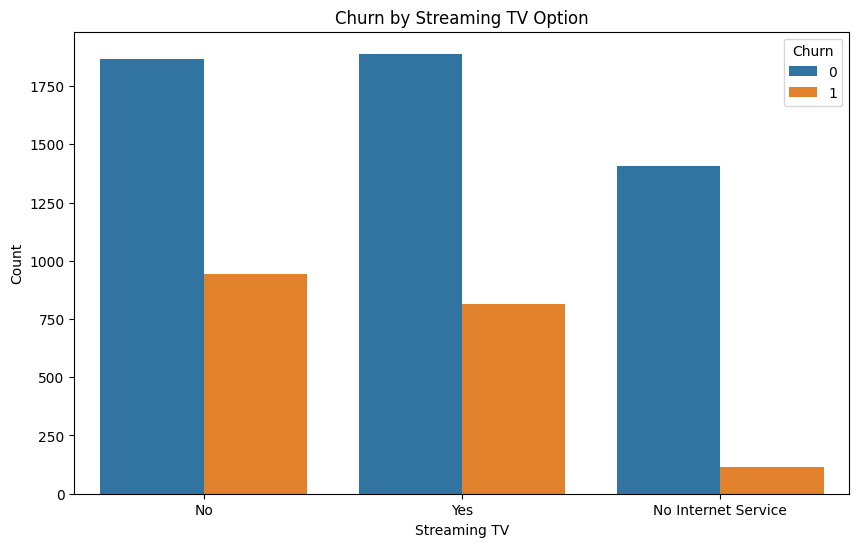

In [88]:


# Mapping StreamingTV codes to their respective categories
values = []
for l in range(3):
    filter = data['StreamingTV'] == l-1
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations['SreamingTV'] = sd
streaming_tv = {
    0: 'No',
    1: 'Yes',
    -1: 'No Internet Service'
}
data['StreamingTV'] = data['StreamingTV'].map(streaming_tv)

# Visualization: Churn vs StreamingTV
plt.figure(figsize=(10, 6))
sns.countplot(x='StreamingTV', hue='Churn', data=data)
plt.title('Churn by Streaming TV Option')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()


4.55560949659956


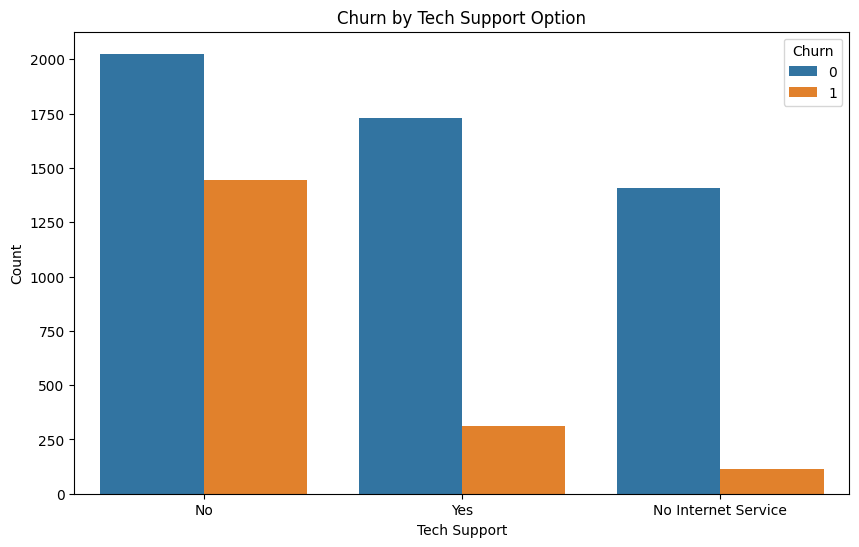

In [89]:
values = []
for l in range(3):
    filter = data['TechSupport'] == l-1
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations['TechSupport'] = sd
tech_support = {
    0: 'No',
    1: 'Yes',
    -1: 'No Internet Service'
}
data['TechSupport'] = data['TechSupport'].map(tech_support)
plt.figure(figsize=(10, 6))
sns.countplot(x='TechSupport', hue='Churn', data=data)
plt.title('Churn by Tech Support Option')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.show()

4.755540737091923


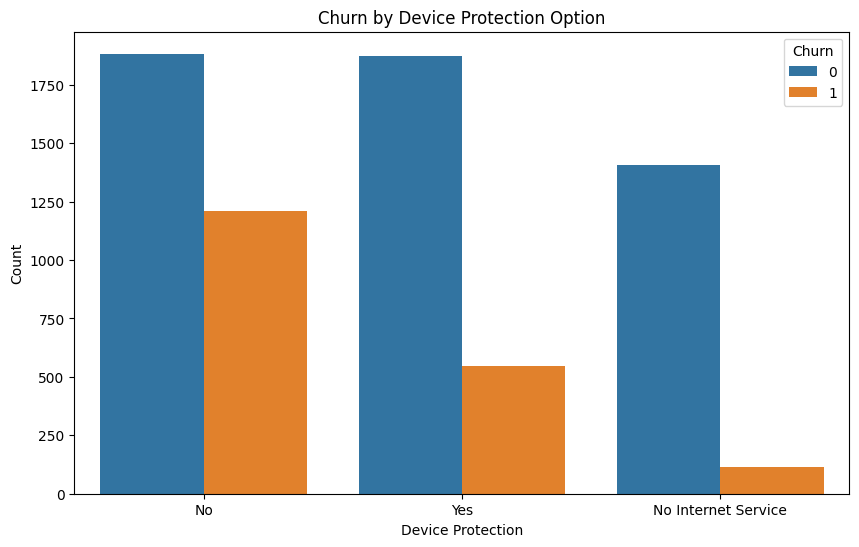

In [90]:
values = []
for l in range(3):
    filter = data['DeviceProtection'] == l-1
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations['DeviceProtection'] = sd
device_protection = {
    0: 'No',
    1: 'Yes',
    -1: 'No Internet Service'
}
data['DeviceProtection'] = data['DeviceProtection'].map(device_protection)

plt.figure(figsize=(10, 6))
sns.countplot(x='DeviceProtection', hue='Churn', data=data)
plt.title('Churn by Device Protection Option')
plt.xlabel('Device Protection')
plt.ylabel('Count')
plt.show()

4.543564295482603


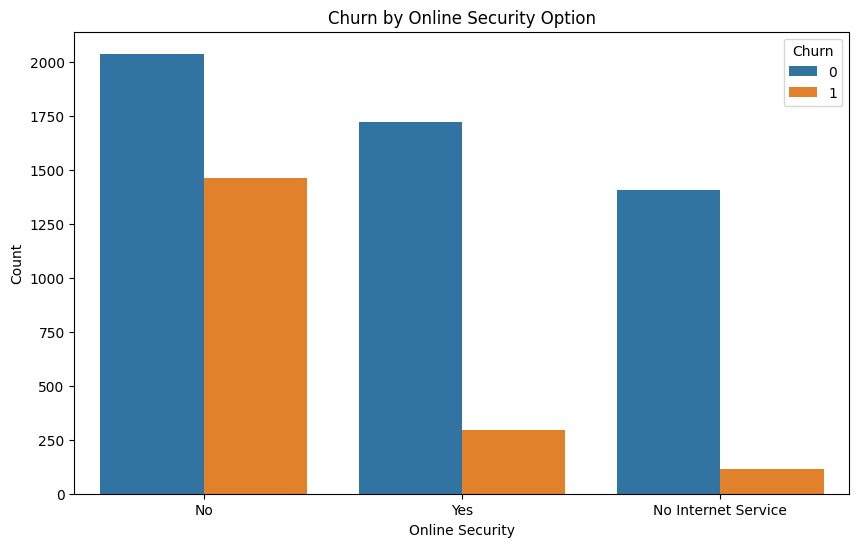

In [91]:
values = []
for l in range(3):
    filter = data['OnlineSecurity'] == l-1
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations['OnlineSecurity'] = sd
online_security = {
    0: 'No',
    1: 'Yes',
    -1: 'No Internet Service'
}
data['OnlineSecurity'] = data['OnlineSecurity'].map(online_security)

# Visualization: Churn vs OnlineSecurity
plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title('Churn by Online Security Option')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.show()

0.23714414856501304


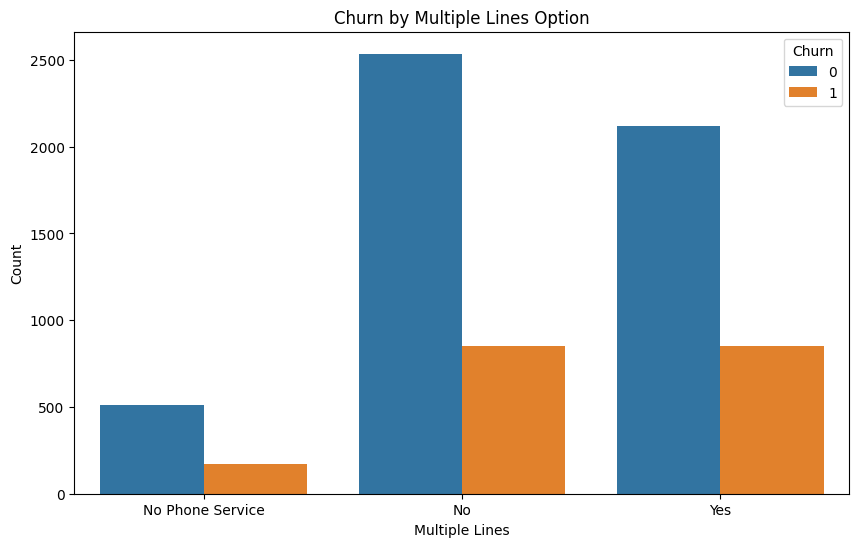

In [92]:
values = []
for l in range(3):
    filter = data['MultipleLines'] == l-1
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations['MultipleLines'] = sd
multiple_lines = {
    0: 'No',
    1: 'Yes',
    -1: 'No Phone Service'
}
data['MultipleLines'] = data['MultipleLines'].map(multiple_lines)

# Visualization: Churn vs MultipleLines
plt.figure(figsize=(10, 6))
sns.countplot(x='MultipleLines', hue='Churn', data=data)
plt.title('Churn by Multiple Lines Option')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.show()

4.687235176997066
InternetService
Fiber Optic            3096
DSL                    2416
No Internet Service    1520
Name: count, dtype: int64
Churn
0    5163
1    1869
Name: count, dtype: int64


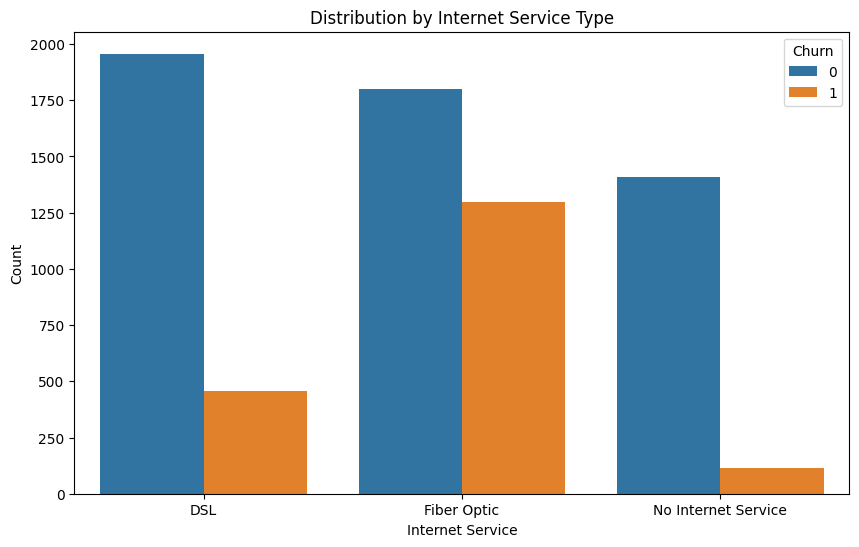

In [93]:
values = []
for l in range(3):
    filter = data['InternetService'] == l
    values.append(getratio(filter))
sd = std(values)
print(sd)
stddeviations['InternetService'] = sd
data['InternetService'] = data['InternetService'].map({1: 'DSL', 2: 'Fiber Optic', 0: 'No Internet Service'})
print(data['InternetService'].value_counts())  # Check the distribution
print(data['Churn'].value_counts())  # Check the distribution

# Try a simplified plot
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Distribution by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()


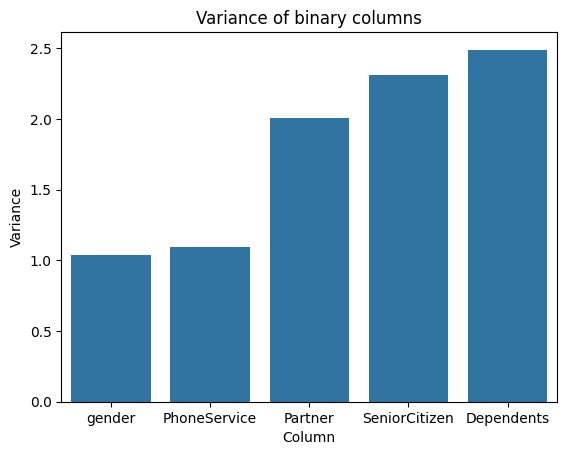

In [94]:
variant = dict(sorted(variant.items(), key=lambda item: item[1]))
keys = list(variant.keys())
vals = [float(variant[k]) for k in keys]
sns.barplot(x=keys, y=vals,)
plt.title('Variance of binary columns')
plt.xlabel('Column')
plt.ylabel('Variance')
plt.show()

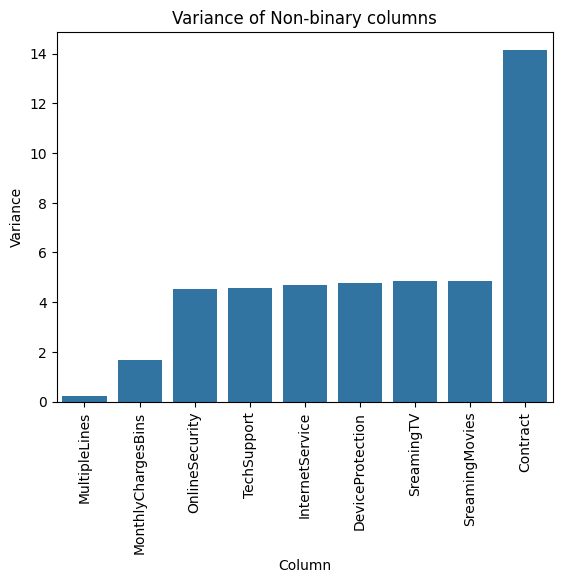

In [96]:
sdv = dict(sorted(stddeviations.items(), key=lambda item: item[1]))
keys = list(sdv.keys())
vals = [float(sdv[k]) for k in keys]
sns.barplot(x=keys, y=vals,)
plt.title('Variance of Non-binary columns')
plt.xlabel('Column')
plt.xticks(rotation=90)
plt.ylabel('Variance')
plt.show()